# Light reanalysis of Čavojová et al (2018)

Čavojová, V., Šrol, J., & Adamus, M. (2018). My point is valid, yours is not: myside bias in reasoning about abortion. *Journal of Cognitive Psychology*, 1-14.
https://www.tandfonline.com/doi/abs/10.1080/20445911.2018.1518961

Read about this on the Research Digest: “My-side bias” makes it difficult for us to see the logic in arguments we disagree with https://digest.bps.org.uk/2018/10/09/my-side-bias-makes-it-difficult-for-us-to-see-the-logic-in-arguments-we-disagree-with/

But I have a long-standing bias of my own: that human irrationally is persistently over-emphasised, and that you can look at studies of bias and find, also, within them evidence of astute judgement and general human reasonableness (see https://www.amazon.co.uk/arguments-sake-evidence-reason-change-ebook/dp/B010O1Z018)

So, this study: Čavojová et al give valid and invalid syllogisms with neutral, pro-life and pro-choice content to 387 participants, who have also completed an abortion attitudes survey. Their analysis suggests that people's attitudes intefere with their ability to recognise good and bad logic. 

But how large is this effect? Does it swamp their ability to spot good logic completely? Substantially? Let's plot the mean proportion of correct judgements for valid and invalid syllogisms, for neutral, pro-choice and pro-life content sylllogisms, when grouping participants by their abortion-attitudes.

First off, let's download their data and convert to csv

https://osf.io/cdxjt/

(and offer a cheer of support to all researchers who upload their raw data like this)

In [1]:
#import libraries and raw data

import pandas as pd #dataframes
import matplotlib.pyplot as plt #plotting
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 12] #make default image size bigger
import warnings; warnings.simplefilter('ignore')

df=pd.read_csv('cavojava2018_data.csv') #import raw data

No documentation, but I think I can work out the variables I want from the paper


For the average proportion correct on each type of syllogisms, syllogisms were (p7) "neutral valid (NV), pro-choice valid
(PChV), pro-life valid (PLV), neutral invalid (NI), pro-choice invalid (PChI), and pro-life invalid (PLI)."

We assume these are the following items in the df:
NV_index; PLV_index; PChV_index

NI_index; PLI_index; PChI_index

Abortion attitudes "The mean reported score on the six items in our sample was 22.68" p7
'''

In [2]:
#confirm this is item Q_sum
df['Q_sum'].mean()

22.677002583979327

Text(0,0.5,'Count')

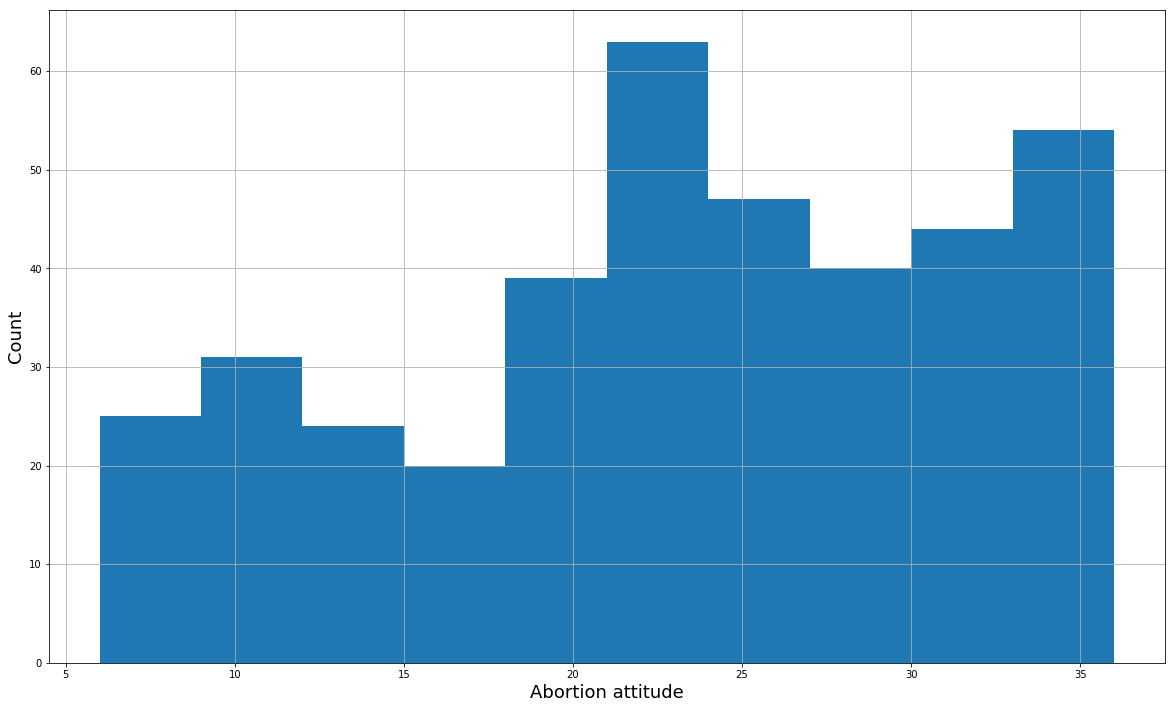

In [3]:
#show distribution of attitudes (there's a good spread)
plt.clf()
df['Q_sum'].hist()
plt.xlabel('Abortion attitude',fontsize=18) #higher is more pro-choice
plt.ylabel('Count',fontsize=18)

# Visualising the raw means

In [4]:
#split attitudes into ten groups of equal size
n_groups=5
df['attitude_decile']=pd.qcut(df['Q_sum'],n_groups)

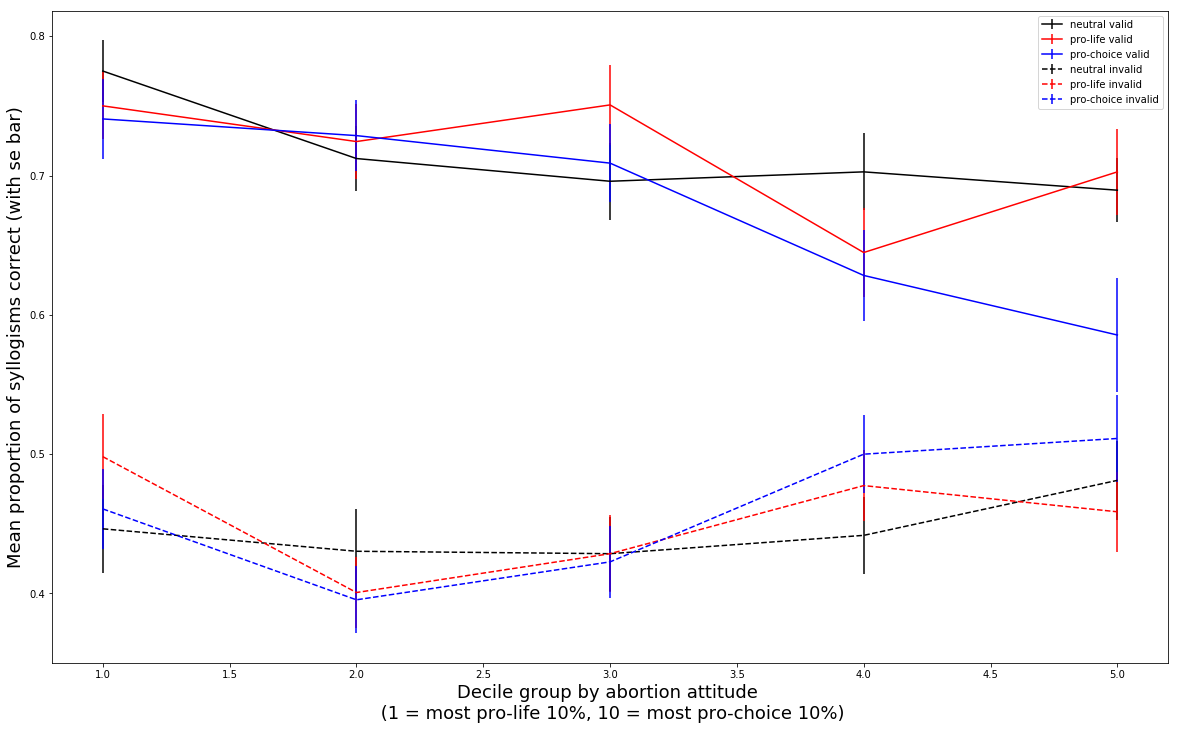

In [7]:
#plot mean proportion correct for all six syllogism types, for the 10 abortion attitude groups
x=range(1,n_groups+1)

ymean=df.groupby('attitude_decile')['NV_index'].mean()
y_err=df.groupby('attitude_decile')['NV_index'].sem()
plt.errorbar(x,ymean,yerr=y_err,ls='-',color='black',label='neutral valid')

ymean=df.groupby('attitude_decile')['PLV_index'].mean()
y_err=df.groupby('attitude_decile')['PLV_index'].sem()
plt.errorbar(x,ymean,yerr=y_err,ls='-',color='red',label='pro-life valid')

ymean=df.groupby('attitude_decile')['PChV_bez25'].mean()
y_err=df.groupby('attitude_decile')['PChV_bez25'].sem()
plt.errorbar(x,ymean,yerr=y_err,ls='-',color='blue',label='pro-choice valid')

ymean=df.groupby('attitude_decile')['NI_index'].mean()
y_err=df.groupby('attitude_decile')['NI_index'].sem()
plt.errorbar(x,ymean,yerr=y_err,ls='--',color='black',label='neutral invalid')

ymean=df.groupby('attitude_decile')['PLI_index'].mean()
y_err=df.groupby('attitude_decile')['PLI_index'].sem()
plt.errorbar(x,ymean,yerr=y_err,ls='--',color='red',label='pro-life invalid')

ymean=df.groupby('attitude_decile')['PChI_index'].mean()
y_err=df.groupby('attitude_decile')['PChI_index'].sem()
plt.errorbar(x,ymean,yerr=y_err,ls='--',color='blue',label='pro-choice invalid')

plt.legend(loc=0)
#plt.ylim([0,1])
plt.ylabel('Mean proportion of syllogisms correct (with se bar)',fontsize=18)
plt.xlabel('Decile group by abortion attitude \n (1 = most pro-life 10%, 10 = most pro-choice 10%)',fontsize=18)

plt.savefig('means.png')


# What this means

The effect of syllogism validity (solid vs dashed lines) is huge - and about the same for all three types of syllogisms for participants with the full range of abortion attitudes.

A possible exception is syllogisms with pro-choice content judged by people with pro-choice attitudes (blue lines, on the right of the plot). Here it looks like the participants with the most extreme attitudes lose the ability to tell valid from invalid syllogisms (and not because they judge them as all valid or all invalid either). This is curious because the most direct prediction of a partisan bias would be that they would judge valid pro-life syllogisms as invalid as well as invalid pro-choice syllogisms as invalid, which isn't what is happening.

So, my prejudice is mostly confirmed - the biggest driver of perception of whether a syllogism is logically valid or not, is whether the syllogisism actually is logically valid or not.

# Acknowledgement

Thanks to the original authors who pointed out an omission in my analysis and that the main conclusion is also supported by the supplementary analysis they published with the paper (which I had missed). Responsibility for errors of analysis and intepretation remains mine alone.